# **Etiketleme yapma ve YOLOv3 ile veri seti eğitimi**



# Etiketleme

* İlk olarak üstünde çalışılacak görseller bir dosya içerisinde toplanır.
* Terminal ekranına **pip install labelImg** yazılarak lamelImg uygulaması indirilir çalıştırılır.
* OpenDir yazan kısma görsellerin dosya yolu kopyalanarak görseller uygulama içerisine alınır.
* Change Save Dir butonuna yine görsellerin dosya yolunu kopyalanarak oluşturulacak txt dosyalarının kayıt yeri belirlenir
* Create ReactBox butonuna tıklanılarak görsel üzerindeki nesne işaretlenip etiket ismi girilir.
* Bu işlemler sonucunda görsellerin olduğu dosyada nesnenin paremetlerinin yazlı olduğu txt dosyaları ve içinde etiket isminin yazılı olduğu txt dosyası oluşur.
* https://github.com/Burakzdd/YOLO_Labelling/blob/main/creating-train-and-test-txt-files.py Link içerisinde yer alan kod ile eğitim ve test dosyaları oluşturulur.
* https://github.com/Burakzdd/YOLO_Labelling/blob/main/creating-files-data-and-name.py Link içerisinde yer alan kod ile .names uzantılı etiket dosyası ve .data uzantılı veri dosyası oluşturulur.

** https://burakzdd.medium.com/yolo-da-etiketleme-ve-veri-seti-e%C4%9Fitimi-f566416ba8f9 etiketleme adımları bu yazının baş kısımları ile benzerlik göstermektedir


#**Eğitim Başlamadan önce?**

****

* Üst panelden dosya'ya tıklayıp Drive'da bir kopya oluştura tıklayın.

* Çalışma zamanı'ndan çalışma zamanı türünü değiştire tıklayın ve GPU'yu seçin


# **Eğer bağlantınız koparsa veya oturumunuzu kaybederseniz**

<ins>**NOT**</ins>:  Drive hesabını aktif etmek için 2, 5 ve 6. adımları tekrar çalıştırmanız gerekir, her seferinde makefile'ı düzenlemek (make komutu) gerekir.

# **1) Drive hesabına yolov3 dosyası oluşturulur ve o dosyanın içine de training dosyası yüklenir**

 Drive hesabına yolov4 dosyası oluşturulur. 
 
 Sonra, **yolov4** dosyasının içine de** training** dosyası oluşturulur. Daha önce oluşturulan .data uzantılı dosya buraya yüklenir.

# **2) Drive'a bağlanma**

In [ ]:
#Drive'a bağlanılır
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# Bu şekilde /content/gdrive/My\ Drive/ /mydrive bir senbolik bağlantı oluşturulur, ve mydrive'a ulaşılır
!ln -s /content/gdrive/My\ Drive/ /mydrive

# mydrive 'ın içindeki dosyalar listelenir
!ls /mydrive

# yolov4 klasörüne girilir
%cd /mydrive/yolov3

/
Mounted at /content/gdrive
'124 2.jpg'
 124.jpg
 1iha.jpg
'96548075_560390377950801_6366086638371774473_n 2 (1).jpg'
'96548075_560390377950801_6366086638371774473_n 2.jpg'
 96548075_560390377950801_6366086638371774473_n.jpg
'96832677_606406119967170_8744109295436938889_n 2.jpg'
 96832677_606406119967170_8744109295436938889_n.jpg
'Adsız doküman (1).gdoc'
'Adsız doküman.gdoc'
'Adsız klasör'
 backup
 Belge1.docx
 BÖ_HandControllerRobot_report.pdf
'Burak Özdemir 151220194028 (1).docx'
'Burak Özdemir 151220194028.docx'
'Burak Özdemir 151220194028.gdoc'
'Burak Özdemir _İçerikYazarlığıÖdevi_03.05.2021.docx'
'Burak Özdemir Impact=15.36  Q1.pdf'
'Burak Özdemir Impact=1.62 Q1.pdf'
'Burak Özdemir impact=9.5 Q1.pdf'
'‎Burak Özdemir kişisinden fotoğraf'
'‎Burak Özdemir kişisinden fotoğraf (1)'
'‎Burak Özdemir kişisinden fotoğraf (2)'
'Burak Özdemir_Makale_Özet_07.05.2021.docx'
'Burak_Özdemir_ödev4_09.05.2021 (1).docx'
'Burak_Özdemir_ödev4_09.05.2021 (2).docx'
 Burak_

In [ ]:
!unrar x -Y "/content/gdrive/MyDrive/yolov3/catAndDog.rar" "/content/gdrive/MyDrive/yolov3/"



UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/gdrive/MyDrive/yolov3/catAndDog.rar

Creating    /content/gdrive/MyDrive/yolov3/catAndDog                  OK
Extracting  /content/gdrive/MyDrive/yolov3/catAndDog/cat.4001.jpg          1%  OK 
Extracting  /content/gdrive/MyDrive/yolov3/catAndDog/cat.4001.txt          1%  OK 
Extracting  /content/gdrive/MyDrive/yolov3/catAndDog/cat.4002.jpg          1%  OK 
Extracting  /content/gdrive/MyDrive/yolov3/catAndDog/cat.4002.txt          1%  OK 
Extracting  /content/gdrive/MyDrive/yolov3/catAndDog/cat.4003.jpg          1%  OK 
Extracting  /content/gdrive/MyDrive/yolov3/catAndDog/cat.4003.txt          1%  OK 
Extracting  /content/gdrive/MyDrive/yolov3/catAndDog/cat.4004.jpg          2%  OK 
Extracting  /content/gdrive/MyDrive/yolov3/catAndDog/cat.4004.txt          2%  OK 
Extracting  /content/gdrive/MyDrive/yolov3/catAndDog/cat.400

In [ ]:

# Importing needed library
import os


"""
Start of:
Setting up full path to directory with labelled images
"""

# Full or absolute path to the folder with images
# Find it with Py file getting-full-path.py
# Pay attention! If you're using Windows, yours path might looks like:
# r'C:\Users\my_name\Downloads\video-to-annotate'
# or:
# 'C:\\Users\\my_name\\Downloads\\video-to-annotate'
full_path_to_images = '/content/gdrive/MyDrive/yolov3/catAndDog/'

"""
End of:
Setting up full path to directory with labelled images
"""


"""
Start of:
Getting list of full paths to labelled images
"""

# Check point
# Getting the current directory
# print(os.getcwd())

# Changing the current directory
# to one with images
os.chdir(full_path_to_images)

# Check point
# Getting the current directory
# print(os.getcwd())

# Defining list to write paths in
p = []

# Using os.walk for going through all directories
# and files in them from the current directory
# Fullstop in os.walk('.') means the current directory
for current_dir, dirs, files in os.walk('.'):
    # Going through all files
    for f in files:
        # Checking if filename ends with '.jpeg'
        if f.endswith('.jpg'):
            # Preparing path to save into train.txt file
            # Pay attention!
            # If you're using Windows, it might need to change
            # this: + '/' +
            # to this: + '\' +
            # or to this: + '\\' +
            path_to_save_into_txt_files = full_path_to_images + '/' + f

            # Appending the line into the list
            # We use here '\n' to move to the next line
            # when writing lines into txt files
            p.append(path_to_save_into_txt_files + '\n')


# Slicing first 15% of elements from the list
# to write into the test.txt file
p_test = p[:int(len(p) * 0.15)]

# Deleting from initial list first 15% of elements
p = p[int(len(p) * 0.15):]

"""
End of:
Getting list of full paths to labelled images
"""


"""
Start of:
Creating train.txt and test.txt files
"""

# Creating file train.txt and writing 85% of lines in it
with open('train.txt', 'w') as train_txt:
    # Going through all elements of the list
    for e in p:
        # Writing current path at the end of the file
        train_txt.write(e)

# Creating file test.txt and writing 15% of lines in it
with open('test.txt', 'w') as test_txt:
    # Going through all elements of the list
    for e in p_test:
        # Writing current path at the end of the file
        test_txt.write(e)

"""
End of:
Creating train.txt and test.txt files
"""

'\nEnd of:\nCreating train.txt and test.txt files\n'

In [ ]:

"""
Course:  Training YOLO v3 for Objects Detection with Custom Data

Section-3
Labelling new Dataset in YOLO format
File: creating-files-data-and-name.py
"""


# Creating files labelled_data.data and classes.names
# for training in Darknet framework
#
# Algorithm:
# Setting up full paths --> Reading file classes.txt -->
# --> Creating file classes.names -->
# --> Creating file labelled_data.data
#
# Result:
# Files classes.names and labelled_data.data needed to train
# in Darknet framework


"""
Start of:
Setting up full path to directory with labelled images
"""

# Full or absolute path to the folder with images
# Find it with Py file getting-full-path.py
# Pay attention! If you're using Windows, yours path might looks like:
# r'C:\Users\my_name\Downloads\video-to-annotate'
# or:
# 'C:\\Users\\my_name\\Downloads\\video-to-annotate'

#Bu kodda full_path_to_images değişkenine görsellerin bulunduğu dosya yolunu ata
#Bu kod görsellerin iki tanesini test geri kalanını eğitim seti olarak ayırarak bu görsellerin dosya yollarından txt belgesi oluşturur

"""
Course:  Training YOLO v3 for Objects Detection with Custom Data

Section-3
Labelling new Dataset in YOLO format
File: creating-train-and-test-txt-files.py
"""


# Creating files train.txt and test.txt
# for training in Darknet framework
#
# Algorithm:
# Setting up full paths --> List of paths -->
# --> Extracting 15% of paths to save into test.txt file -->
# --> Writing paths into train and test txt files
#
# Result:
# Files train.txt and test.txt with full paths to images


# Importing needed library
import os


"""
Start of:
Setting up full path to directory with labelled images
"""

# Full or absolute path to the folder with images
# Find it with Py file getting-full-path.py
# Pay attention! If you're using Windows, yours path might looks like:
# r'C:\Users\my_name\Downloads\video-to-annotate'
# or:
# 'C:\\Users\\my_name\\Downloads\\video-to-annotate'
full_path_to_images = "/content/gdrive/MyDrive/yolov3/catAndDog/"

"""
End of:
Setting up full path to directory with labelled images
"""


"""
Start of:
Getting list of full paths to labelled images
"""

# Check point
# Getting the current directory
# print(os.getcwd())

# Changing the current directory
# to one with images

os.chdir(full_path_to_images)

# Check point
# Getting the current directory
# print(os.getcwd())

# Defining list to write paths in
p = []

# Using os.walk for going through all directories
# and files in them from the current directory
# Fullstop in os.walk('.') means the current directory
for current_dir, dirs, files in os.walk('.'):
    # Going through all files
    for f in files:
        # Checking if filename ends with '.jpeg'
        if f.endswith('.jpeg'):
            # Preparing path to save into train.txt file
            # Pay attention!
            # If you're using Windows, it might need to change
            # this: + '/' +
            # to this: + '\' +
            # or to this: + '\\' +
            path_to_save_into_txt_files = full_path_to_images + '/' + f

            # Appending the line into the list
            # We use here '\n' to move to the next line
            # when writing lines into txt files
            p.append(path_to_save_into_txt_files + '\n')


# Slicing first 15% of elements from the list
# to write into the test.txt file
p_test = p[:int(len(p) * 0.15)]

# Deleting from initial list first 15% of elements
p = p[int(len(p) * 0.15):]

"""
End of:
Getting list of full paths to labelled images
"""


"""
Start of:
Creating train.txt and test.txt files
"""

# Creating file train.txt and writing 85% of lines in it
with open('train.txt', 'w') as train_txt:
    # Going through all elements of the list
    for e in p:
        # Writing current path at the end of the file
        train_txt.write(e)

# Creating file test.txt and writing 15% of lines in it
with open('test.txt', 'w') as test_txt:
    # Going through all elements of the list
    for e in p_test:
        # Writing current path at the end of the file
        test_txt.write(e)

"""
End of:
Creating train.txt and test.txt files
"""


"""
End of:
Setting up full path to directory with labelled images
"""


"""
Start of:
Creating file classes.names
"""

# Defining counter for classes
c = 0

# Creating file classes.names from existing one classes.txt
# Pay attention! If you're using Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with open(full_path_to_images + '/' + 'classes.names', 'w') as names, \
     open(full_path_to_images + '/' + 'classes.txt', 'r') as txt:

    # Going through all lines in txt file and writing them into names file
    for line in txt:
        names.write(line)  # Copying all info from file txt to names

        # Increasing counter
        c += 1

"""
End of:
Creating file classes.names
"""


"""
Start of:
Creating file labelled_data.data
"""

# Creating file labelled_data.data
# Pay attention! If you're using Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with open(full_path_to_images + '/' + 'labelled_data.data', 'w') as data:
    # Writing needed 5 lines
    # Number of classes
    # By using '\n' we move to the next line
    data.write('classes = ' + str(c) + '\n')

    # Location of the train.txt file
    data.write('train = ' + full_path_to_images + '/' + 'train.txt' + '\n')

    # Location of the test.txt file
    data.write('valid = ' + full_path_to_images + '/' + 'test.txt' + '\n')

    # Location of the classes.names file
    data.write('names = ' + full_path_to_images + '/' + 'classes.names' + '\n')

    # Location where to save weights
    data.write('backup = backup')

"""
End of:
Creating file labelled_data.data
"""

'\nEnd of:\nCreating file labelled_data.data\n'

# **3) `Darknet` git deposunu klonlama**



In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15054, done.
remote: Total 15054 (delta 0), reused 0 (delta 0), pack-reused 15054
Receiving objects: 100% (15054/15054), 13.40 MiB | 7.82 MiB/s, done.
Resolving deltas: 100% (10233/10233), done.
Checking out files: 100% (2028/2028), done.


# **4) Etiketleme sırasında oluşturulan dosyalar yüklenir**


a.   `Veri seti ` 

b.   `cfg dosyası`

c.   `obj.data ve obj.names dosyaları` 

d.   `train.txt ve test.txt dosyaları`



## 4(a) Görseller ve etiket dosyalarından oluşan klasör sıkıştırılıp (zip) drivedaki yolov4 klasörüne yüklenir 


## 4 (b) Özel * `cfg` * dosyası oluşturulur 

Darknet içerisindeki cfg klasöründeki yolov4_costum.cfg dosyası ile aşağıdaki oynamalar yapılır.


**Değişiklikler aşağıdaki gibi yapılmalıdır:**

*  batch=64
*  subdivisions=16
*   max_batches = (sınıf sayısına göre değişir her sınıf için en az 2000 değerine eşitlenir)
*   steps=x,y    x,y = mat_batches'in %80,90'ına göre belirlenir
*    width=416 height=416
*    dosyanın sonunda 3 tane [yolo] kısmı vardır burda classes=(sınıf sayınız)
*   filters=(classes + 5)x3 
   



## **4(c) *`.data`* ve *`.names`* dosyaları aşağıdaki gibi ayarlanarak drive'a yüklenir**



**.data**

```
classes = 1
train  = data/train.txt
valid  = data/test.txt
names = data/obj.names
backup = /mydrive/yolov4/training

```

## **4(d) train.txt ve test.txt**

Daha önce oluşturulan eğitim ve test (train,test) dosyaları yolov4 içerisine aktarılır.

# **5)  `makefile` dosyasına OPENCV ve GPU 'yu yapılandırma**

Eğer opencv de make komutunda hatalar alınırsa aşağıdaki komutlar ile gerekli yüklemeler yapılabilir

In [ ]:
!sudo apt install libopencv-dev python3-opencv


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-numpy python3-opencv
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,477 kB of archives.
After this operation, 13.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [534 kB]
Fetched 2,477 kB in 1s (1,735 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline


In [ ]:
!sudo apt install cmake

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
# makefile dosyası içerisinde GPU ve OPENCV aktif edilir

%cd /content/gdrive/My Drive/yolov3/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/gdrive/My Drive/yolov3/darknet


# **6)  `make` komutu ile darknet inşaa edilir **

In [ ]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# **7)  `Yolov4`  klasöründeki tüm dosyaları darknet dizinine kopyalayın**

# **8) Önceden eğitilmiş  `yolov4`  ağırlıkları indirilir**

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-06-03 07:27:57--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  22.6MB/s    in 7.9s    

2021-06-03 07:28:06 (19.7 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# **10) EĞİTİM**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## *Eğitime başlanır** 


In [ ]:
!./darknet detector train data/catDog.data cfg/yolov3.cfg darknet53.conv.74 -dont_show -map

Görüntülenen çıkış son 5000 satıra kısaltıldı.
 total_bbox = 128156, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.896735), count: 4, class_loss = 0.021070, iou_loss = 0.212017, total_loss = 0.233088 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 128160, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.830280), count: 4, class_loss = 0.165285, iou_loss = 0.082227, total_loss = 0.247511 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
v3 (mse lo

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

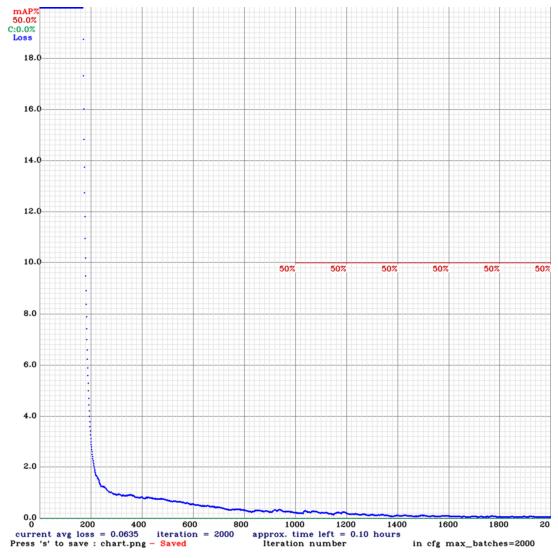

In [ ]:
imShow('chart.png')

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3.cfg
%cd ..

/content/gdrive/My Drive/yolov3/darknet/cfg
/content/gdrive/My Drive/yolov3/darknet


In [ ]:
!./darknet detector test data/catDog.data cfg/yolov3.cfg /content/gdrive/MyDrive/yolov3/darknet/backup/yolov3_best.weights /content/drive/MyDrive/yolov3/test3.jpg -thresh 0.3 
imwrite('/content/gdrive/MyDrive/yolov3/predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0


In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

<ins>**NOT**</ins>: Eğer bağlantınız koparsa veya oturumunuzu kaybederseniz, Drive hesabını aktif etmek için 2, 5 ve 6. adımları tekrar çalıştırmanız gerekir, her seferinde makefile'ı düzenlemek (make komutu) gerekir.

## **Eğitim yarıda kesilirse**

Bağlantınız koparsa veya oturumunuzu kaybederseniz, modelinizi yeniden eğitmeye baştan başlamanız gerekmez. Eğitime kaldığınız yerden yeniden başlayabilirsiniz. En son kaydedilen ağırlıklar kullanılır. Ağırlıklar, drive'da *** yolov4 / training *** klasörüne *** yolov4-custom_last.weights *** olarak her 100 yinelemede kaydedilir.



In [ ]:
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!cat Makefile
!make

[Errno 20] Not a directory: 'darknet'
/content/gdrive/My Drive/yolov4/darknet
GPU=1
CUDNN=1
CUDNN_HALF=1
OPENCV=1
AVX=0
OPENMP=0
LIBSO=1
ZED_CAMERA=0
ZED_CAMERA_v2_8=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)
# set ZED_CAMERA=1 to enable ZED SDK 3.0 and above
# set ZED_CAMERA_v2_8=1 to enable ZED SDK 2.X

USE_CPP=0
DEBUG=0

ARCH= -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	    -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# GeForce RTX 3070, 3080, 3090
# ARCH= -gencode arch=compute_86,code=[sm_86,compute_86]

# Kepler GeForce GTX 770, GTX 760, GT 740
# ARCH= -gencode arch=compute_30,code=sm_30

# Tesla A100 (GA100), DGX-A100, RTX 3080
# ARCH= -gencode arch=co

In [ ]:
#to restart training your custom detector where you left off(using the weights that were saved last)

!./darknet detector train data/obj.data cfg/yolov4-custom.cfg //content/gdrive/MyDrive/yolov4/training/yolov4-custom_last.weights -dont_show -map


Görüntülenen çıkış son 5000 satıra kısaltıldı.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 15710, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.903779), count: 16, class_loss = 0.039514, iou_loss = 74.580528, total_loss = 74.620041 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.787425), count: 14, class_loss = 0.339080, iou_loss = 9.445899, total_loss = 9.784979 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.000000), count: 1, class_loss = 0.012623, iou_loss = 0.000000, total_loss = 0.012623 
 total_bbox = 15740, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.922187), count: 26, class_loss = 0.000746, iou_loss = 152.461517, total_loss = 152.462265 

In [ ]:
#set your custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom.cfg
%cd ..

/content/gdrive/My Drive/yolov4/darknet/cfg
/content/gdrive/My Drive/yolov4/darknet


Burak Özdemir

In [ ]:
%cd /mydrive/yolov3/darknet

/content/gdrive/My Drive/yolov3/darknet


In [ ]:
!./darknet detector test data/catDog.data cfg/yolov3.cfg /mydrive/yolov3/darnket/backup/yolov3_best.weights /mydrive/yolov3/test3.jpg -thresh 0.3 
imshow("iha.jpg")

/bin/bash: ./darknet: Transport endpoint is not connected


NameError: ignored